In [1]:
import numpy as np
import datetime
from collections import Counter
import pandas as pd
import re
import matplotlib.pyplot as plt
import random

In [2]:
incidents = pd.read_csv("Police_Incident_Reports.csv")

In [3]:
incidents["IncidentType"] = incidents["IncidentType"].str.strip()

In [4]:
IncidentType = dict(incidents["IncidentType"].value_counts())
data = []
for key,value in IncidentType.items():
    if value >= 500:
        data.append(key)

In [5]:
get_year = incidents['IncidentDate'].values
years = []
datetimes = []
for i, element in enumerate(get_year):
    year = element[0:4]
    month = element[5:7]
    day = element[8:10]
    years.append(int(year))
    datetimes.append(datetime.date(int(year), int(month), int(day)))
incidents["Year"] = years
incidents['Datetime'] = datetimes

In [6]:
years = incidents["Year"].unique().tolist()
yearlist = sorted(years)[-10:-2]

In [7]:
df = incidents.loc[(incidents['Year'].isin(yearlist)) & (incidents['IncidentType'].isin(data))]
yeardict = {}
for year in yearlist:
    yeardict[year] = Counter(df.loc[df['Year'] == year, 'IncidentType'].tolist())

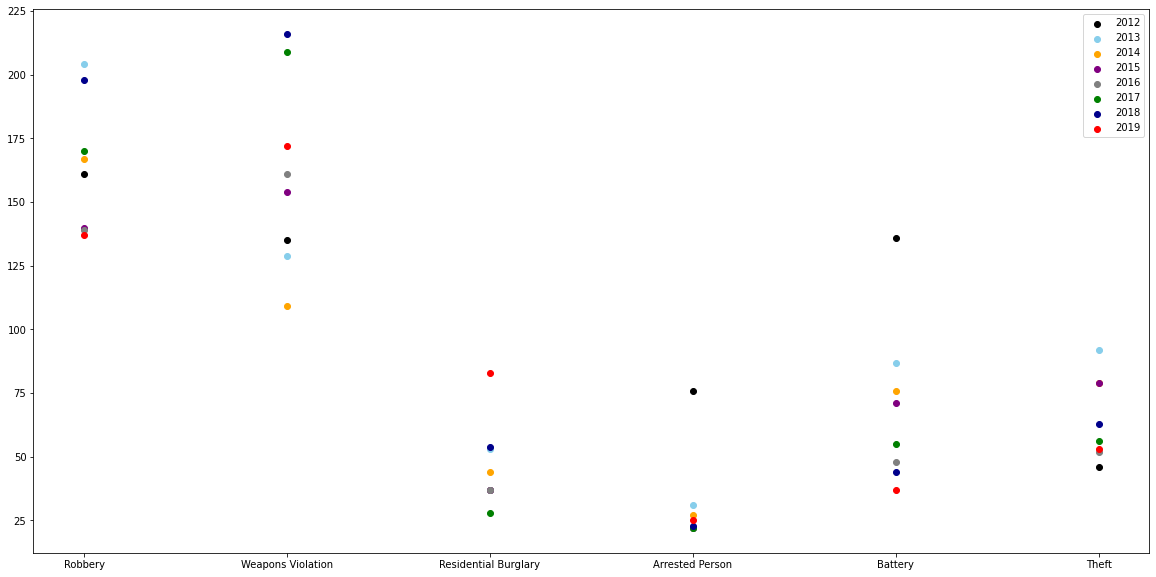

In [10]:
colours = [ "red", "darkblue", "green", "grey", "purple", "orange", "skyblue", "black" ]
plt.figure(figsize=(20,10))
for data in yeardict.values(): 
    x = list(data.keys())
    y = list(data.values())
    plt.scatter(x,y,color=colours.pop())

plt.legend(yeardict.keys())
plt.show()